# Analise de dados

In [ ]:
# Contextualizar como foi gerado e quais colunas foram acrescentadas
import pandas as pd
df = pd.read_csv('/content/base_custos_medicos_final.csv')
df.head()

,idade,genero,imc,filhos,fumante,regiao,nivel_atividade,pressao_alta,colesterol_alto,frequenta_checkup,ingestao_alcool,nivel_estresse,encargos
0,29,feminino,30.30,4,sim,sudeste,moderada,nao,nao,nao,nenhum,10.0,18458.01
1,34,feminino,27.38,0,sim,noroeste,moderada,sim,nao,nao,moderado,6.0,16344.73
2,30,feminino,21.04,1,sim,sudoeste,baixa,nao,nao,sim,moderado,10.0,16837.44
3,23,feminino,24.66,2,sim,sudeste,moderada,sim,nao,sim,nenhum,5.0,15519.77
4,33,masculino,27.37,4,nao,nordeste,moderada,nao,sim,sim,exagerado,7.0,13704.02


In [ ]:
# Analise das colunas com seus tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idade              1000 non-null   int64  
 1   genero             1000 non-null   object 
 2   imc                950 non-null    float64
 3   filhos             1000 non-null   int64  
 4   fumante            1000 non-null   object 
 5   regiao             1000 non-null   object 
 6   nivel_atividade    950 non-null    object 
 7   pressao_alta       1000 non-null   object 
 8   colesterol_alto    1000 non-null   object 
 9   frequenta_checkup  1000 non-null   object 
 10  ingestao_alcool    950 non-null    object 
 11  nivel_estresse     950 non-null    float64
 12  encargos           1000 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 101.7+ KB


In [ ]:
df.shape

(1000, 13)

In [ ]:
df.describe()

,idade,imc,filhos,nivel_estresse,encargos
count,1000.000000,950.000000,1000.000000,950.000000,1000.000000
mean,41.536000,27.121421,1.971000,5.446316,15183.085280
std,14.021245,4.957651,1.434649,2.871825,3476.777964
min,18.000000,8.730000,0.000000,1.000000,6036.120000
25%,29.000000,23.872500,1.000000,3.000000,12424.827500
50%,42.000000,27.240000,2.000000,5.000000,15255.320000
75%,54.000000,30.587500,3.000000,8.000000,17795.920000
max,64.000000,41.590000,4.000000,10.000000,24281.060000


In [ ]:
# Frequência de categorias
print("Gênero:", df['genero'].value_counts())
print("Fumante:", df['fumante'].value_counts())
print("Região:", df['regiao'].value_counts())
print("Atividade Física:", df['nivel_atividade'].value_counts())
print("Tem pressão alta:", df['pressao_alta'].value_counts())
print("Tem colesterol alto:", df['colesterol_alto'].value_counts())
print("Frequenta checkup:", df['frequenta_checkup'].value_counts())
print("Álcool:", df['ingestao_alcool'].value_counts())


Gênero: genero
masculino    502
feminino     498
Name: count, dtype: int64
Fumante: fumante
sim    505
nao    495
Name: count, dtype: int64
Região: regiao
sudoeste    261
noroeste    254
sudeste     249
nordeste    236
Name: count, dtype: int64
Atividade Física: nivel_atividade
baixa       338
moderada    315
alta        297
Name: count, dtype: int64
Tem pressão alta: pressao_alta
nao    663
sim    337
Name: count, dtype: int64
Tem colesterol alto: colesterol_alto
nao    749
sim    251
Name: count, dtype: int64
Frequenta checkup: frequenta_checkup
sim    503
nao    497
Name: count, dtype: int64
Álcool: ingestao_alcool
exagerado    334
moderado     310
nenhum       306
Name: count, dtype: int64


In [ ]:
# Verifica quantos valores nulos existem em cada coluna
df.isnull().sum()

,0
idade,0
genero,0
imc,50
filhos,0
fumante,0
regiao,0
nivel_atividade,50
pressao_alta,0
colesterol_alto,0
frequenta_checkup,0


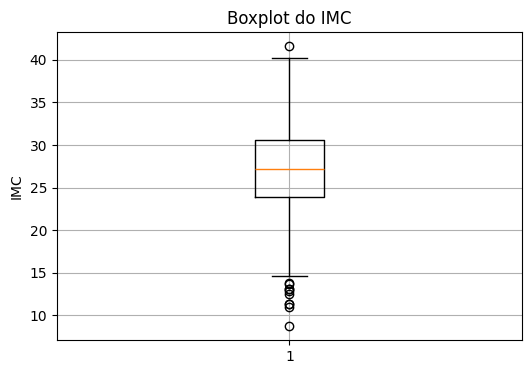

In [ ]:
# Indentificar outliers visualmente
import matplotlib.pyplot as plt

# Remover valores nulos da coluna 'imc'
imc_sem_nan = df['imc'].dropna()

# Plotar boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(imc_sem_nan)
plt.title('Boxplot do IMC')
plt.ylabel('IMC')
plt.grid(True)
plt.show()

In [ ]:
# Existem outliers, vamos tratar os dados nulos de IMC com medina(melhor pratica quando existe outliers)
df['imc'] = df['imc'].fillna(df['imc'].median())

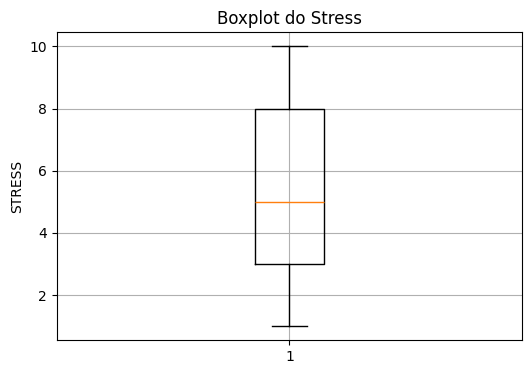

In [ ]:
# Remover valores nulos da coluna 'nivel_estresse'
nivel_estresse_sem_nan = df['nivel_estresse'].dropna()

# Plotar boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(nivel_estresse_sem_nan)
plt.title('Boxplot do Stress')
plt.ylabel('STRESS')
plt.grid(True)
plt.show()

In [ ]:
# Não existem outliers, podemos aplicar para tratar os dados a media.
df['nivel_estresse'] = df['nivel_estresse'].fillna(df['nivel_estresse'].mean())

In [ ]:
# As colunas nivel_atividade e ingestao_alcool, são categóricas. Vamos explicitar a ausência.
df['nivel_atividade'] = df['nivel_atividade'].fillna('desconhecido')
df['ingestao_alcool'] = df['ingestao_alcool'].fillna('desconhecido')

In [ ]:
# Vamos verificar se existem dados nulos ainda.
df.isnull().sum()

,0
idade,0
genero,0
imc,0
filhos,0
fumante,0
regiao,0
nivel_atividade,0
pressao_alta,0
colesterol_alto,0
frequenta_checkup,0


In [ ]:
# Frequência de categorias
print("Atividade Física:", df['nivel_atividade'].value_counts())
print("Álcool:", df['ingestao_alcool'].value_counts())

Atividade Física: nivel_atividade
baixa           338
moderada        315
alta            297
desconhecido     50
Name: count, dtype: int64
Álcool: ingestao_alcool
exagerado       334
moderado        310
nenhum          306
desconhecido     50
Name: count, dtype: int64


In [ ]:
# Codificar variáveis categóricas
df.select_dtypes(include='object').columns

Index(['genero', 'fumante', 'regiao', 'nivel_atividade', 'pressao_alta',
       'colesterol_alto', 'frequenta_checkup', 'ingestao_alcool'],
      dtype='object')

In [ ]:
# Label Encoding
df['genero'] = df['genero'].map({'masculino': 0, 'feminino': 1})
df['fumante'] = df['fumante'].map({'nao': 0, 'sim': 1})
df['pressao_alta'] = df['pressao_alta'].map({'nao': 0, 'sim': 1})
df['colesterol_alto'] = df['colesterol_alto'].map({'nao': 0, 'sim': 1})
df['frequenta_checkup'] = df['frequenta_checkup'].map({'nao': 0, 'sim': 1})

In [ ]:
df.head()

,idade,genero,imc,filhos,fumante,regiao,nivel_atividade,pressao_alta,colesterol_alto,frequenta_checkup,ingestao_alcool,nivel_estresse,encargos
0,29,1,30.30,4,1,sudeste,moderada,0,0,0,nenhum,10.0,18458.01
1,34,1,27.38,0,1,noroeste,moderada,1,0,0,moderado,6.0,16344.73
2,30,1,21.04,1,1,sudoeste,baixa,0,0,1,moderado,10.0,16837.44
3,23,1,24.66,2,1,sudeste,moderada,1,0,1,nenhum,5.0,15519.77
4,33,0,27.37,4,0,nordeste,moderada,0,1,1,exagerado,7.0,13704.02


In [ ]:
# One Hot Encoding
new_df = pd.get_dummies(df, columns=['regiao', 'nivel_atividade', 'ingestao_alcool'], drop_first=True)

new_df.head()

,idade,genero,imc,filhos,fumante,pressao_alta,colesterol_alto,frequenta_checkup,nivel_estresse,encargos,regiao_noroeste,regiao_sudeste,regiao_sudoeste,nivel_atividade_baixa,nivel_atividade_desconhecido,nivel_atividade_moderada,ingestao_alcool_exagerado,ingestao_alcool_moderado,ingestao_alcool_nenhum
0,29,1,30.30,4,1,0,0,0,10.0,18458.01,False,True,False,False,False,True,False,False,True
1,34,1,27.38,0,1,1,0,0,6.0,16344.73,True,False,False,False,False,True,False,True,False
2,30,1,21.04,1,1,0,0,1,10.0,16837.44,False,False,True,True,False,False,False,True,False
3,23,1,24.66,2,1,1,0,1,5.0,15519.77,False,True,False,False,False,True,False,False,True
4,33,0,27.37,4,0,0,1,1,7.0,13704.02,False,False,False,False,False,True,True,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecionar apenas colunas numéricas
colunas_numericas = new_df.select_dtypes(include=['int64', 'float64']).columns

# Criar uma cópia separada para escalar
scaler = StandardScaler()
new_df[colunas_numericas] = scaler.fit_transform(new_df[colunas_numericas])

In [ ]:
new_df.describe()

,idade,genero,imc,filhos,fumante,pressao_alta,colesterol_alto,frequenta_checkup,nivel_estresse,encargos
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-8.526513e-17,-7.638334e-17,2.842171e-17,-4.263256e-17,1.243450e-17,7.105427e-18,-3.641532e-17,-5.506706e-17,8.970602e-17,1.953993e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.679436e+00,-9.960080e-01,-3.809254e+00,-1.374543e+00,-1.010051e+00,-7.129485e-01,-5.788899e-01,-1.006018e+00,-1.589312e+00,-2.632191e+00
25%,-8.945192e-01,-9.960080e-01,-6.102621e-01,-6.771594e-01,-1.010051e+00,-7.129485e-01,-5.788899e-01,-1.006018e+00,-8.744228e-01,-7.937343e-01
50%,3.310920e-02,-9.960080e-01,2.332469e-02,2.022412e-02,9.900495e-01,-7.129485e-01,-5.788899e-01,9.940179e-01,0.000000e+00,2.078674e-02
75%,8.893816e-01,1.004008e+00,6.574292e-01,7.176076e-01,9.900495e-01,1.402626e+00,1.727444e+00,9.940179e-01,9.128010e-01,7.518864e-01
max,1.602942e+00,1.004008e+00,2.994557e+00,1.414991e+00,9.900495e-01,1.402626e+00,1.727444e+00,9.940179e-01,1.627691e+00,2.618093e+00


In [ ]:
new_df.head()

,idade,genero,imc,filhos,fumante,pressao_alta,colesterol_alto,frequenta_checkup,nivel_estresse,encargos,regiao_noroeste,regiao_sudeste,regiao_sudoeste,nivel_atividade_baixa,nivel_atividade_desconhecido,nivel_atividade_moderada,ingestao_alcool_exagerado,ingestao_alcool_moderado,ingestao_alcool_nenhum
0,-0.894519,1.004008,0.656912,1.414991,0.990050,-0.712949,-0.578890,-1.006018,1.627691,0.942414,False,True,False,False,False,True,False,False,True
1,-0.537739,1.004008,0.052312,-1.374543,0.990050,1.402626,-0.578890,-1.006018,0.197912,0.334282,True,False,False,False,False,True,False,True,False
2,-0.823163,1.004008,-1.260413,-0.677159,0.990050,-0.712949,-0.578890,0.994018,1.627691,0.476068,False,False,True,True,False,False,False,True,False
3,-1.322655,1.004008,-0.510876,0.020224,0.990050,1.402626,-0.578890,0.994018,-0.159533,0.096887,False,True,False,False,False,True,False,False,True
4,-0.609095,-0.996008,0.050242,1.414991,-1.010051,-0.712949,1.727444,0.994018,0.555356,-0.425626,False,False,False,False,False,True,True,False,False


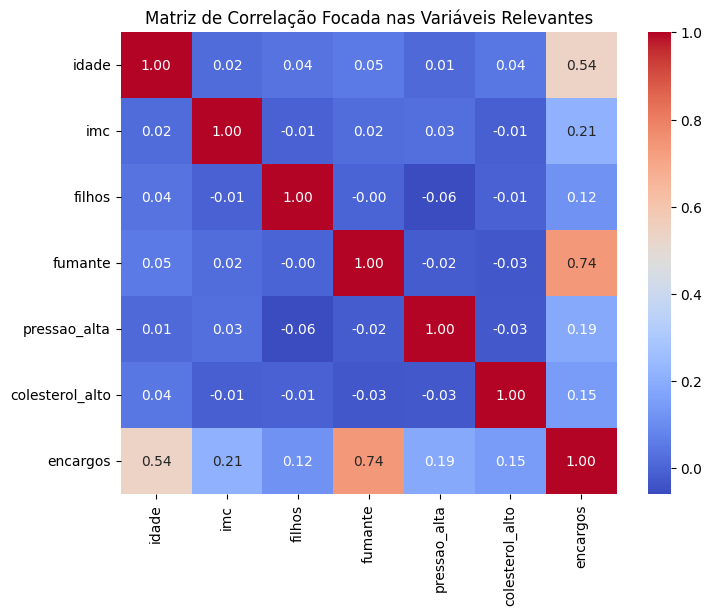

In [ ]:
import seaborn as sns

# Calcular correlação
correlacao = new_df.corr(numeric_only=True)

# Filtrar apenas as que têm correlação significativa com 'encargos'
limiar = 0.1
variaveis_relevantes = correlacao['encargos'][abs(correlacao['encargos']) > limiar].index

# Criar nova matriz de correlação com apenas essas variáveis
correlacao_reduzida = new_df[variaveis_relevantes].corr()

# Plotar
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_reduzida, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação Focada nas Variáveis Relevantes")
plt.show()

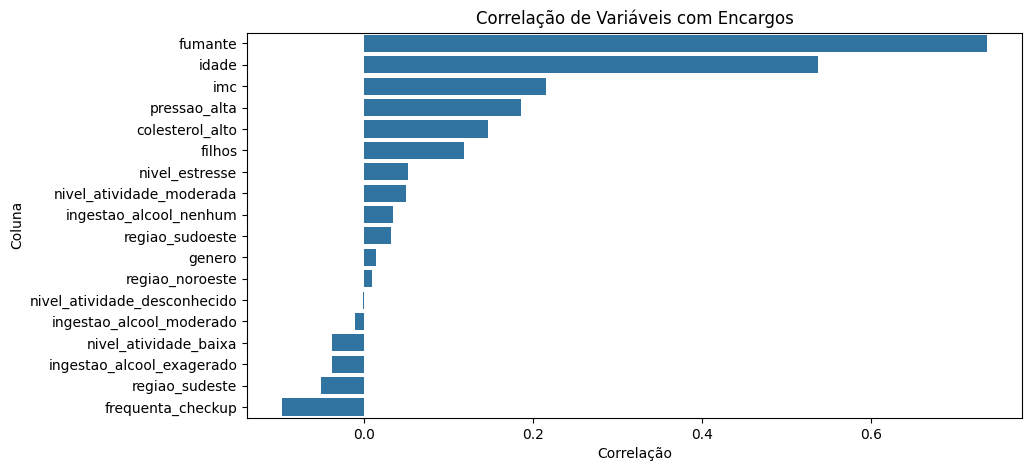

In [ ]:
# Correlação com encargos
corre_com_encargos = correlacao['encargos'].drop('encargos').sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=corre_com_encargos.values, y=corre_com_encargos.index)
plt.title('Correlação de Variáveis com Encargos')
plt.xlabel('Correlação')
plt.ylabel('Coluna')
plt.show()

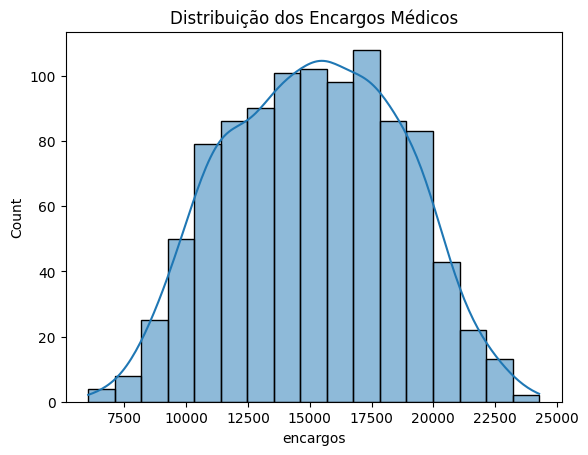

In [ ]:
sns.histplot(df['encargos'], kde=True)
plt.title('Distribuição dos Encargos Médicos')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Separar os dados
X = new_df.drop('encargos', axis=1)
y = new_df['encargos']

# Dividir em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressão Linear

In [ ]:
# Criar e treinar o modelo
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Previsões no conjunto de teste
y_pred = modelo_lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Erros
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MSE: 0.09
RMSE: 0.30
R²: 0.91


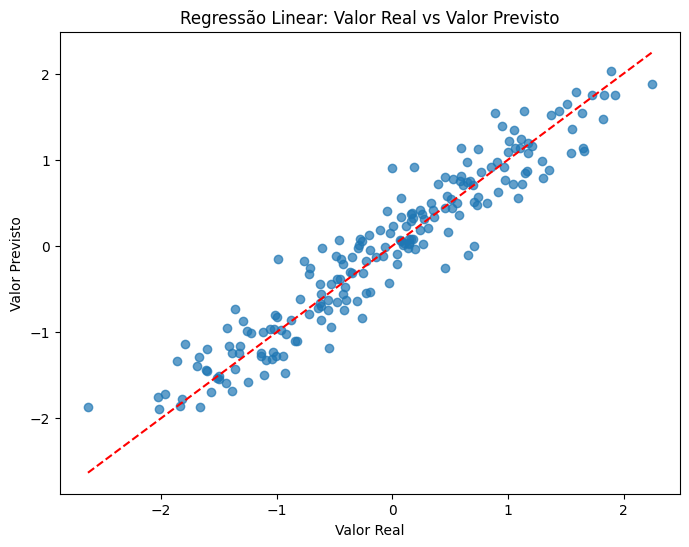

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto")
plt.title("Regressão Linear: Valor Real vs Valor Previsto")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Árvore de Decisão Regressora

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Criar o modelo definindo hiperparâmetros
arvore = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=5,        # profundidade máxima da árvore (ajuste inicial)
    min_samples_leaf=10, # mínimo de amostras em cada folha
    random_state=42
)

# Treinar a Árvore de Decisão Regressora
arvore.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)

In [ ]:
# Previsões no conjunto de teste
y_pred_arvore = arvore.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse_arvore = mean_squared_error(y_test, y_pred_arvore)
rmse_arvore = np.sqrt(mse_arvore)
r2_arvore = r2_score(y_test, y_pred_arvore)

print(f"Árvore de Decisão – MSE: {mse_arvore:.2f}")
print(f"Árvore de Decisão – RMSE: {rmse_arvore:.2f}")
print(f"Árvore de Decisão – R²: {r2_arvore:.2f}")

Árvore de Decisão – MSE: 0.18
Árvore de Decisão – RMSE: 0.42
Árvore de Decisão – R²: 0.82


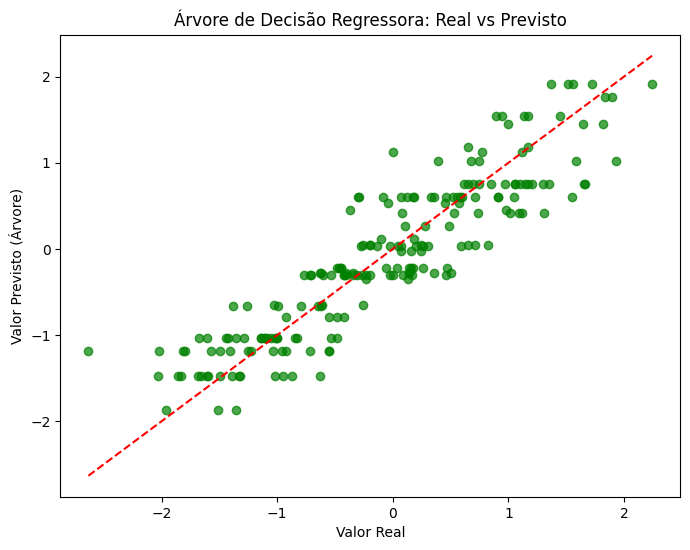

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_arvore, alpha=0.7, color='green')
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto (Árvore)")
plt.title("Árvore de Decisão Regressora: Real vs Previsto")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Criar o modelo básico
rf = RandomForestRegressor(
    n_estimators=100,      # número de árvores no grupo (100 é bom ponto de partida)
    max_depth=5,           # mesma profundidade da árvore anterior para compararmos
    min_samples_leaf=10,   # mesma restrição mínima de folhas
    random_state=42
)

# Treinar
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, random_state=42)

In [ ]:
# Previsões no conjunto de teste
y_pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest – MSE: {mse_rf:.2f}")
print(f"Random Forest – RMSE: {rmse_rf:.2f}")
print(f"Random Forest – R²: {r2_rf:.2f}")

Random Forest – MSE: 0.14
Random Forest – RMSE: 0.37
Random Forest – R²: 0.86


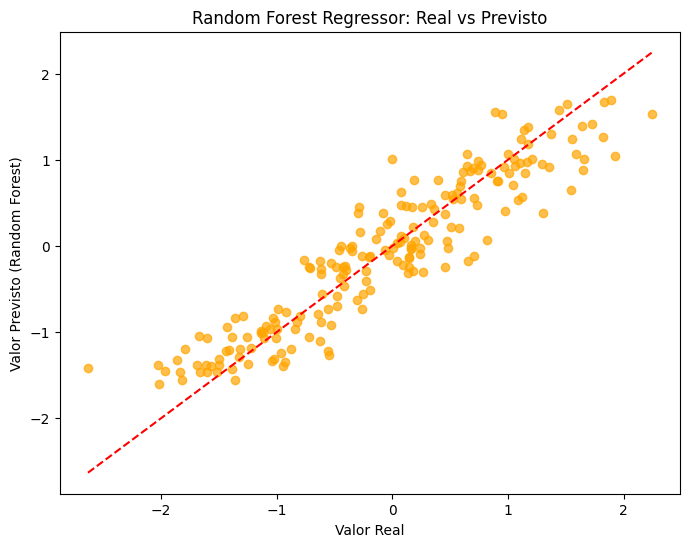

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='orange')
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto (Random Forest)")
plt.title("Random Forest Regressor: Real vs Previsto")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Calcular Resíduos

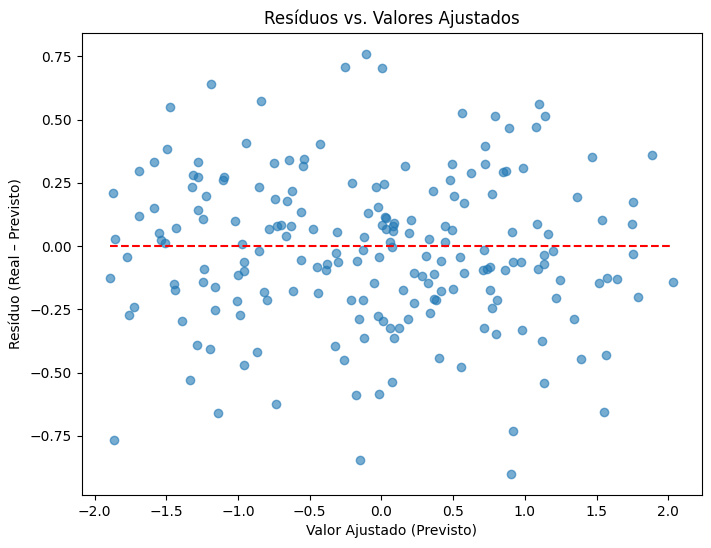

In [ ]:
# Calcular Resíduos
residuos = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, alpha=0.6)
plt.hlines(0, y_pred.min(), y_pred.max(), colors='r', linestyles='--')
plt.xlabel("Valor Ajustado (Previsto)")
plt.ylabel("Resíduo (Real – Previsto)")
plt.title("Resíduos vs. Valores Ajustados")
plt.show()

# homocedasticidade, validando nossa regressão linear